#NN California Housing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

##Load & Understand Data

In [2]:
# Load real-world housing data
housing = fetch_california_housing()

X = housing.data
y = housing.target   # Median house value (in $100,000s)

feature_names = housing.feature_names
df = pd.DataFrame(X, columns=feature_names)
df["HousePrice"] = y

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



“Which features do you think affect house prices the most?”

##Data Visualization

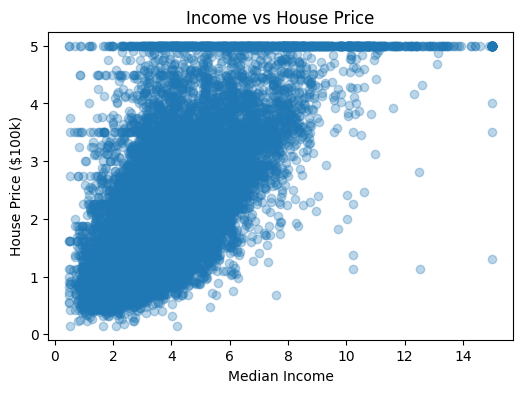

In [3]:
plt.figure(figsize=(6,4))
plt.scatter(df["MedInc"], df["HousePrice"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("House Price ($100k)")
plt.title("Income vs House Price")
plt.show()

Question: Is the relationship perfectly linear?

Answer:
No. There is a clear upward trend, but the points are scattered. This tells us that income is important, but it is not the only factor. This is why a neural network is useful instead of simple linear regression.

Inference discussion:
Higher income → higher house price, but not perfectly linear.

##Train/Test Split & Scaling

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


###“Why do we scale before ANN?”

Question: Is the relationship perfectly linear?
Answer:
No. There is a clear upward trend, but the points are scattered. This tells us that income is important, but it is not the only factor. This is why a neural network is useful instead of simple linear regression.

##Heart of the code

Epoch 1/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 13.2882 - mae: 2.9705 - val_loss: 8.8156 - val_mae: 2.5622
Epoch 2/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8.4737 - mae: 2.5055 - val_loss: 8.6160 - val_mae: 2.5432
Epoch 3/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.3893 - mae: 2.5060 - val_loss: 8.4677 - val_mae: 2.5341
Epoch 4/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.2551 - mae: 2.4860 - val_loss: 8.4459 - val_mae: 2.5294
Epoch 5/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1786 - mae: 2.4739 - val_loss: 8.4041 - val_mae: 2.5258
Epoch 6/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3247 - mae: 2.5016 - val_loss: 8.4400 - val_mae: 2.5316
Epoch 7/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.3001 - mae: 2.4955 - val_loss: 8.4260 - val_mae: 2.5298
Epoch 8/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1640 - mae: 2.4767 - val_loss: 8.4539 - val_mae: 2.5347
Epoch 9/30
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - l

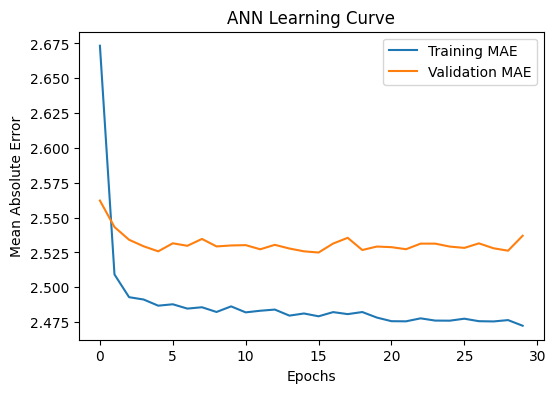

In [24]:
# Build the neural network
ann_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)   # regression output
])

# Compile the model
ann_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# Train the model
history = ann_model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_split=0.2,
    verbose=1
)

# Plot learning curve
plt.figure(figsize=(6,4))
plt.plot(history.history['mae'], label="Training MAE")
plt.plot(history.history['val_mae'], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("ANN Learning Curve")
plt.legend()
plt.show()


##Evaluating the Model on Test Data


Epoch 1/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 8.1282 - mae: 2.4677 - val_loss: 8.5056 - val_mae: 2.5340
Epoch 2/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 8.1530 - mae: 2.4768 - val_loss: 8.4304 - val_mae: 2.5315
Epoch 3/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.1731 - mae: 2.4838 - val_loss: 8.5432 - val_mae: 2.5406
Epoch 4/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.0582 - mae: 2.4568 - val_loss: 8.5019 - val_mae: 2.5340
Epoch 5/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2330 - mae: 2.4911 - val_loss: 8.4140 - val_mae: 2.5277
Epoch 6/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8.2775 - mae: 2.4861 - val_loss: 8.4418 - val_mae: 2.5325
Epoch 7/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.1083 - mae: 2.4682 - val_loss: 8.4574 - val_mae: 2.5301
Epoch 8/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 8.0881 - mae: 2.4617 - val_loss: 8.4325 - val_mae: 2.5277
Epoch 9/50
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

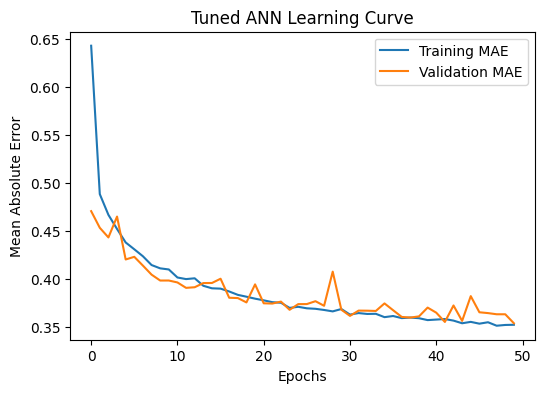

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

tuned_ann_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu', ),
    Dense(1)   # regression output
])
tuned_ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train the model
history = ann_model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

plt.figure(figsize=(6,4))
plt.plot(tuned_history.history['mae'], label="Training MAE")
plt.plot(tuned_history.history['val_mae'], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Tuned ANN Learning Curve")
plt.legend()
plt.show()

##Making a Real-World Prediction

In [7]:
# Example house input
# [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
new_house = np.array([[6.5, 20, 6, 1, 300, 3, 34, -118]])

# Scale input using the same scaler
new_house_scaled = scaler.transform(new_house)

# Predict house price
prediction = ann_model.predict(new_house_scaled)[0][0]

print("Predicted House Price:", round(prediction * 100000, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted House Price: 260778.0


##Coding time: Hyperparameter tuning

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Tuned neural network model
tuned_ann_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)
])

tuned_ann_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

tuned_history = tuned_ann_model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    verbose=1
)

# Plot learning curve
plt.figure(figsize=(6,4))
plt.plot(tuned_history.history['mae'], label="Training MAE")
plt.plot(tuned_history.history['val_mae'], label="Validation MAE")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.title("Tuned ANN Learning Curve")
plt.legend()
plt.show()

##Lets compare

Original Model MAE: 0.368
Tuned Model MAE:    0.349


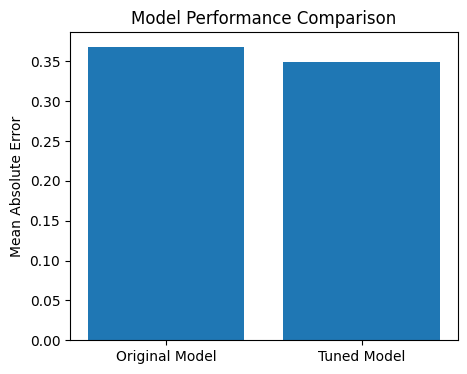

In [13]:
# Evaluate original model
old_loss, old_mae = ann_model.evaluate(X_test, y_test, verbose=0)

# Evaluate tuned model
new_loss, new_mae = tuned_ann_model.evaluate(X_test, y_test, verbose=0)

print("Original Model MAE:", round(old_mae, 3))
print("Tuned Model MAE:   ", round(new_mae, 3))
# Visual comparison of MAE
model_names = ["Original Model", "Tuned Model"]
mae_values = [old_mae, new_mae]

plt.figure(figsize=(5,4))
plt.bar(model_names, mae_values)
plt.ylabel("Mean Absolute Error")
plt.title("Model Performance Comparison")
plt.show()


## Real World Test

In [31]:
# Same example house used earlier
new_house = np.array([[6.5, 20, 6, 1, 300, 3, 34, -118]])
new_house_scaled = scaler.transform(new_house)

# Prediction from original model
old_prediction = ann_model.predict(new_house_scaled)[0][0]

# Prediction from tuned model
new_prediction = tuned_ann_model.predict(new_house_scaled)[0][0]

print("Original Model Prediction:", round(old_prediction * 100000, 0))
print("Tuned Model Prediction:   ", round(new_prediction * 100000, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Original Model Prediction: 480865.0
Tuned Model Prediction:    -6131.0


The tuned model not only reduces average error but also changes individual predictions because it has learned better feature relationships.

##E-commerce product classification.

##Data Loading and Visualization (E-commerce Products)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


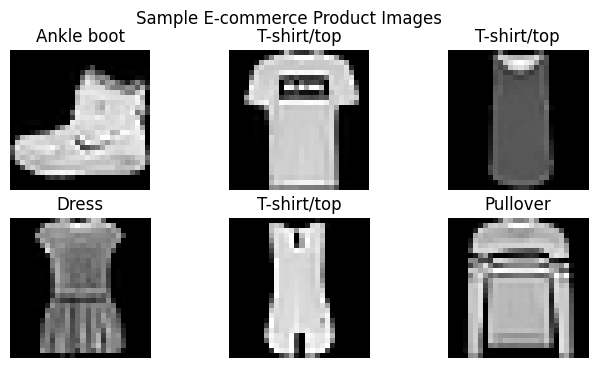

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion-MNIST dataset (e-commerce style products)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Class names represent product categories
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Normalize pixel values to range [0,1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape data for CNN input (height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Visualize sample product images
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle("Sample E-commerce Product Images")
plt.show()

#CNN

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.7313 - loss: 0.7375 - val_accuracy: 0.8753 - val_loss: 0.3412
Epoch 2/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 35ms/step - accuracy: 0.8690 - loss: 0.3606 - val_accuracy: 0.8891 - val_loss: 0.3030
Epoch 3/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 54s 36ms/step - accuracy: 0.8870 - loss: 0.3066 - val_accuracy: 0.8977 - val_loss: 0.2801
Epoch 4/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 58s 38ms/step - accuracy: 0.8990 - loss: 0.2740 - val_accuracy: 0.8940 - val_loss: 0.2873
Epoch 5/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 42ms/step - accuracy: 0.9091 - loss: 0.2469 - val_accuracy: 0.9071 - val_loss: 0.2530
Epoch 6/6
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.9188 - loss: 0.2232 - val_accuracy: 0.9079 - val_loss: 0.2577


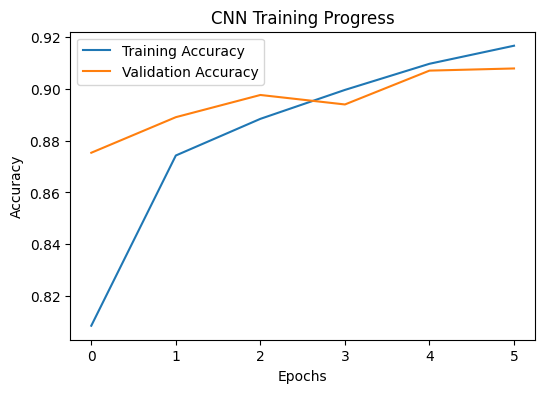

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile model
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = cnn_model.fit(
    x_train,
    y_train,
    epochs=6,
    validation_split=0.2,
    verbose=1
)

# Plot training and validation accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("CNN Training Progress")
plt.legend()
plt.show()

##Model Output, Prediction, and Product Sorting

In [37]:
import numpy as np

# Simple inventory database
inventory = []

def classify_product_with_input():
    """
    Takes user input for image index,
    classifies product using CNN,
    sorts predictions,
    and stores result in inventory.
    """

    # Take input from user
    image_index = int(input("Enter product image index to classify: "))

    # Get image
    image = x_test[image_index]

    # Model prediction
    probs = cnn_model.predict(image.reshape(1,28,28,1), verbose=0)[0]

    # Sort categories by confidence
    sorted_indices = np.argsort(probs)[::-1]

    sorted_predictions = [
        {
            "category": class_names[idx],
            "confidence": round(probs[idx] * 100, 2)
        }
        for idx in sorted_indices
    ]

    # Assign top category
    assigned_category = sorted_predictions[0]["category"]
    confidence = sorted_predictions[0]["confidence"]

    # Store in inventory
    product_entry = {
        "product_id": len(inventory) + 1,
        "image_index": image_index,
        "assigned_category": assigned_category,
        "confidence": confidence,
        "top_3_predictions": sorted_predictions[:3]
    }

    inventory.append(product_entry)

    # Display result
    print("\nProduct successfully added to inventory")
    print("Product ID:", product_entry["product_id"])
    print("Assigned Category:", assigned_category)
    print("Confidence:", confidence, "%")
    print("Top 3 Predictions:")

    for pred in product_entry["top_3_predictions"]:
        print("  ", pred["category"], "-", pred["confidence"], "%")


# -------------------------------
# Backend-style interaction loop
# -------------------------------

while True:
    classify_product_with_input()

    cont = input("\nClassify another product? (y/n): ")
    if cont.lower() != 'y':
        break

print("\nFinal Inventory:")
for item in inventory:
    print(item)

Enter product image index to classify: 4

Product successfully added to inventory
Product ID: 1
Assigned Category: Shirt
Confidence: 94.07 %
Top 3 Predictions:
   Shirt - 94.07 %
   T-shirt/top - 4.32 %
   Pullover - 0.77 %

Classify another product? (y/n): y
Enter product image index to classify: 2

Product successfully added to inventory
Product ID: 2
Assigned Category: Trouser
Confidence: 100.0 %
Top 3 Predictions:
   Trouser - 100.0 %
   T-shirt/top - 0.0 %
   Dress - 0.0 %

Classify another product? (y/n): n

Final Inventory:
{'product_id': 1, 'image_index': 4, 'assigned_category': 'Shirt', 'confidence': np.float32(94.07), 'top_3_predictions': [{'category': 'Shirt', 'confidence': np.float32(94.07)}, {'category': 'T-shirt/top', 'confidence': np.float32(4.32)}, {'category': 'Pullover', 'confidence': np.float32(0.77)}]}
{'product_id': 2, 'image_index': 2, 'assigned_category': 'Trouser', 'confidence': np.float32(100.0), 'top_3_predictions': [{'category': 'Trouser', 'confidence': np.fl